In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv', header=None)

In [64]:
df.head()

,0,1,2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


In [3]:
y=df[0]

In [4]:
X=df.loc[:,[1,2]]

In [7]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def cost_function(X, y, w):
    y_=sigmoid(X.dot(w))
    ll = -(y*np.log(y_) + (1-y)*np.log(1 - y_)). mean()
    return ll

def cost_function_L2(X, y, w, C):
    #scores = np.dot(X, w)
    y_=sigmoid(X.dot(w))
    ll = -(y*np.log(y_) + (1-y)*np.log(1 - y_)). mean()+C*np.square(w).mean()
    return ll

def gradient_descent(X, y, w, alpha, iterations,accuracy):
    
    cost_history = []
    X_=np.column_stack(([1] * len(X), X))
    
    for iteration in range(iterations):
        
        scores = np.dot(X_, w)
        predictions = sigmoid(scores)
        #print(predictions)
        output_error_signal = y - predictions
        #print(output_error_signal)
        gradient = np.dot(X_.T, output_error_signal)
        #print(gradient)
        w += alpha * gradient 
        cost = cost_function(X_, y, w)
        if cost<accuracy:
            break
        cost_history.append(cost)
        

    return w, cost_history

def gradient_descent_L2(X, y, w, alpha, iterations, accuracy, C):
    
    cost_history = []
    X_=np.column_stack(([1] * len(X), X))
    
    for iteration in range(iterations):
        scores = np.dot(X_, w)
        predictions = sigmoid(scores)
        output_error_signal = y - predictions
        gradient = np.dot(X_.T, output_error_signal)
        w += alpha * gradient-alpha*C*w
        cost = cost_function_L2(X_, y, w, C)
        if cost<accuracy:
            break
        cost_history.append(cost)   

    return w, cost_history

In [11]:
# Задание 1. Градиентный спуск для обычной логистической регрессии без регуляризации
w = np.zeros(X.shape[1]+1)
alpha=0.0001
iterations=1000
accuracy=10**(-5)
(w, c) = gradient_descent(X,y,w,alpha, iterations,accuracy)
c

[0.6839859745965516,
 0.675288970280978,
 0.6670024822811241,
 0.6590766453229556,
 0.6514665288092469,
 0.644132527884021,
 0.6370402627614107,
 0.630160190906974,
 0.6234670835633512,
 0.6169394654718862,
 0.6105590752281591,
 0.6043103751828118,
 0.5981801219738101,
 0.5921569985901082,
 0.5862313036380387,
 0.5803946912429624,
 0.574639954462082,
 0.5689608453977056,
 0.5633519259064782,
 0.5578084436337908,
 0.5523262289259009,
 0.5469016089210031,
 0.5415313357709586,
 0.536212526495137,
 0.5309426124245049,
 0.5257192965692946,
 0.5205405175497696,
 0.5154044189784414,
 0.5103093233839342,
 0.5052537099302999,
 0.5002361953182582,
 0.49525551736256124,
 0.49031052082727705,
 0.485400145172187,
 0.48052341392182335,
 0.4756794254164508,
 0.47086734474354414,
 0.46608639668064467,
 0.4613358595071855,
 0.4566150595650155,
 0.4519233664657403,
 0.44726018885833463,
 0.44262497068330015,
 0.43801718785038657,
 0.43343634528593317,
 0.4288819743035051,
 0.42435363025794043,
 0.419850

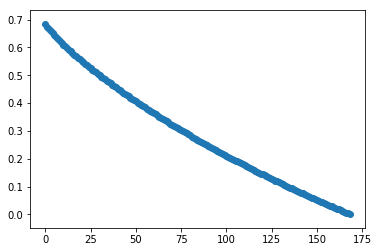

In [12]:
#очень странный график "1"  похожий на log-loss
plt.scatter(range(len(c)), c)

In [13]:
# Задание 1. Градиентный спуск для логистической регрессии с L2 регуляризацией
w = np.zeros(X.shape[1]+1)
alpha=0.001
iterations=1000
accuracy=10**(-5)
C=0.001
(w, c) = gradient_descent_L2(X,y,w,alpha, iterations,accuracy, C)
c

[0.611573396780913,
 0.552965478640248,
 0.5005456679953134,
 0.4518196624931043,
 0.40596975345723296,
 0.36257554487890903,
 0.3213559743701784,
 0.2820938851391293,
 0.24460833887671968,
 0.20874257731421095,
 0.1743579826678612,
 0.1413306248820372,
 0.10954903381723781,
 0.078912600901076,
 0.04933033177242643,
 0.020719813088989777]

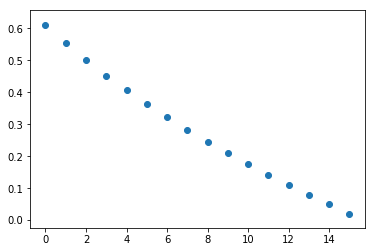

In [14]:
#очень странный график "2", похожий на log-loss
plt.scatter(range(len(c)), c)

#Задание 2.
Алгоритм градиентного спуска в данном случае сходится очень быстро, поэтому размер шага был сильно уменьшен, чтобы не проскочить минимум и на графике было видно как уменьшается ошибка.

In [231]:
#Задание 3
def sigmoid_P(y,X,w,n):
    X_=np.column_stack(([1] * len(X), X))
    P_history = []
    for i in np.random.randint(0,len(y)-1,20):
        p=1 / (1 + np.exp(-np.dot(X_[i].T,w)))
        P_history.append(p)
    return P_history
        
sigmoid_P(y,X,w,20)


[0.10564499116099425,
 0.10419427517705995,
 0.13898785189419416,
 0.14791779685187795,
 0.13714240489818813,
 0.7525495201629949,
 0.43618807498384576,
 0.2615048570188954,
 0.10835371910014982,
 0.4029936308792716,
 0.2615048570188954,
 0.48346050062283535,
 0.16420962049287838,
 0.2867864453372199,
 0.13856100912996927,
 0.23086621485435177,
 0.49327384894938525,
 0.49523056318611747,
 0.794036959056543,
 0.5493553422735986]

Задание 5.

In [29]:
#Задание 5.
w = [-1,-1,-1]
alpha=0.0001
iterations=1000
accuracy=10**(-5)
(w, c) = gradient_descent(X,y,w,alpha, iterations,accuracy)
c

[2.1073613744182627,
 2.064539180975494,
 2.0218673197321633,
 1.979349799492817,
 1.9369907992497934,
 1.8947946804609206,
 1.8527660002927737,
 1.8109095258760097,
 1.7692302496163537,
 1.7277334056010958,
 1.686424487136653,
 1.645309265448164,
 1.604393809567722,
 1.563684507434542,
 1.523188088229398,
 1.4829116459689626,
 1.4428626643960376,
 1.403049043223027,
 1.3634791258241397,
 1.3241617285345304,
 1.2851061718129473,
 1.2463223136735386,
 1.2078205860127618,
 1.169612034776615,
 1.1317083653686715,
 1.0941219953394992,
 1.0568661172865645,
 1.0199547761115626,
 0.9834029664293021,
 0.9472267581168988,
 0.9114434608629243,
 0.8760718422434408,
 0.8411324183848384,
 0.8066478416107449,
 0.7726434152808511,
 0.7391477714921854,
 0.7061937508069844,
 0.6738195219112663,
 0.642069968857358,
 0.6109983486252624,
 0.580668175480575,
 0.5511552135004351,
 0.5225493431237997,
 0.4949558834812786,
 0.4684956320779051,
 0.4433023243837307,
 0.4195154376963271,
 0.3972658749394339,
 0.

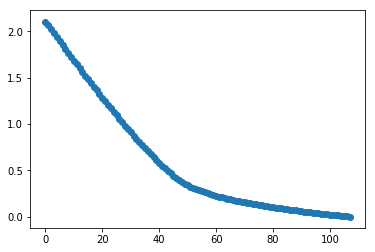

In [30]:
plt.scatter(range(len(c)), c)

Начальное приближение весов влияет на сходимость алгоритма и на его скорость. Можно так неудачно выбрать начальное приближение, что алгоритм перестаёт сходится, но если перепробовать различные шаги, то получить хорошую сходимость.
Можно по-разному инициализировать начальное приближение(например случайно), но в большинстве источников рекомендуют начинать именно с нулевого.